In [1]:
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

In [2]:
print('hello')

hello


In [3]:
positif = pd.read_pickle(r'data/imdb_raw_pos.pickle')
negatif = pd.read_pickle(r'data/imdb_raw_neg.pickle')
print('COMMENTAIRE Positif ',len(positif))
print('COMMENTAIRE negatif', len(negatif))

COMMENTAIRE Positif  12500
COMMENTAIRE negatif 12500


In [4]:
pos = {'Critiques': positif}
neg = {'Critiques': negatif}

In [5]:
# Creates pandas DataFrame.
df1 = pd.DataFrame(pos)
df1['Sentiment'] = 'positif'
df1['Reponse'] = 1
df2 = pd.DataFrame(neg)
df2['Sentiment'] = 'Negatif'
df2['Reponse'] = 0

In [6]:
### CONCAT DATA
data = pd.concat([df1, df2])
data

,Critiques,Sentiment,Reponse
0,I went and saw this movie last night after bei...,positif,1
1,Actor turned director Bill Paxton follows up h...,positif,1
2,As a recreational golfer with some knowledge o...,positif,1
3,"I saw this film in a sneak preview, and it is ...",positif,1
4,Bill Paxton has taken the true story of the 19...,positif,1
...,...,...,...
12495,I occasionally let my kids watch this garbage ...,Negatif,0
12496,When all we have anymore is pretty much realit...,Negatif,0
12497,The basic genre is a thriller intercut with an...,Negatif,0
12498,Four things intrigued me as to this film - fir...,Negatif,0


<AxesSubplot:xlabel='Reponse', ylabel='count'>

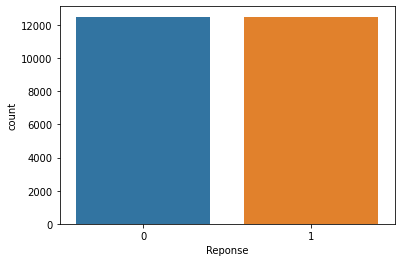

In [7]:
sns.countplot(x='Reponse', data=data)

In [8]:
# SHUFFLED DATA
shuffled = data.sample(frac=1).reset_index()
shuffled = shuffled.drop(['index'], axis=1)
print(shuffled.head(10))

                                           Critiques Sentiment  Reponse
0  The movie is good and I think Tiffany Amber is...   positif        1
1  The sequel is exactly what you will expect it ...   positif        1
2  From all the bad comments about this movie and...   Negatif        0
3  I totally agree that the reenactments kill wha...   Negatif        0
4  I'm shocked that all the "hated it" ratings ar...   Negatif        0
5  Based on an actual story, John Boorman shows t...   positif        1
6  If you are a Catalan nationalist anarcho-socia...   Negatif        0
7  Pat O'Brien had his best role ever as Notre Da...   positif        1
8  This was a crappy, miserably acted movie based...   Negatif        0
9  Movie Title - Tart<br /><br />Date of review -...   Negatif        0


# PREPROCESSING

In [9]:
import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\utilisateur\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
def Text_Cleaning(Text):
  # Lowercase the texts
  Text = Text.lower()

  # Cleaning punctuations in the text
  punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
  Text = Text.translate(punc)

  # Removing numbers in the text
  Text = re.sub(r'\d+', '', Text)

  # Remove possible links
  Text = re.sub('https?://\S+|www\.\S+', '', Text)

  # Deleting newlines
  Text = re.sub('\n', '', Text)

  return Text

In [13]:
# Stopwords
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
  Processed_Text = list()
  Lemmatizer = WordNetLemmatizer()
  # Tokens of Words
  Tokens = nltk.word_tokenize(Text)
  for word in Tokens:
    if word not in Stopwords:
      Processed_Text.append(Lemmatizer.lemmatize(word))

  return(" ".join(Processed_Text))

In [14]:
shuffled["Critiques_Clean"] = shuffled["Critiques"].apply(lambda Text: Text_Cleaning(Text))
#shuffled["Critiques_Clean"] = shuffled["Critiques"].apply(lambda Text: Text_Processing(Text))

In [15]:
shuffled

,Critiques,Sentiment,Reponse,Critiques_Clean
0,The movie is good and I think Tiffany Amber is...,positif,1,the movie is good and i think tiffany amber is...
1,The sequel is exactly what you will expect it ...,positif,1,the sequel is exactly what you will expect it ...
2,From all the bad comments about this movie and...,Negatif,0,from all the bad comments about this movie and...
3,I totally agree that the reenactments kill wha...,Negatif,0,i totally agree that the reenactments kill wha...
4,"I'm shocked that all the ""hated it"" ratings ar...",Negatif,0,i m shocked that all the hated it ratings ar...
...,...,...,...,...
24995,"Gary Cooper, (Michael Brandon) played the role...",positif,1,gary cooper michael brandon played the role...
24996,I can't actually think of one good point in th...,Negatif,0,i can t actually think of one good point in th...
24997,This movie has got to be the worse movie i hav...,Negatif,0,this movie has got to be the worse movie i hav...
24998,"Taut, topical political thriller, taking squar...",positif,1,taut topical political thriller taking squar...


In [16]:
shuffled.describe(include = "all")

,Critiques,Sentiment,Reponse,Critiques_Clean
count,25000,25000,25000.00000,25000
unique,24801,2,NaN,24800
top,Loved today's show!!! It was a variety and not...,Negatif,NaN,loved today s show it was a variety and not...
freq,5,12500,NaN,5
mean,NaN,NaN,0.50000,NaN
std,NaN,NaN,0.50001,NaN
min,NaN,NaN,0.00000,NaN
25%,NaN,NaN,0.00000,NaN
50%,NaN,NaN,0.50000,NaN
75%,NaN,NaN,1.00000,NaN


In [17]:
# Text Polarity
from textblob import TextBlob

In [18]:
#pip install TextBlob

In [19]:
shuffled["polarity"] = shuffled["Critiques_Clean"].map(lambda Text: TextBlob(Text).sentiment.polarity)

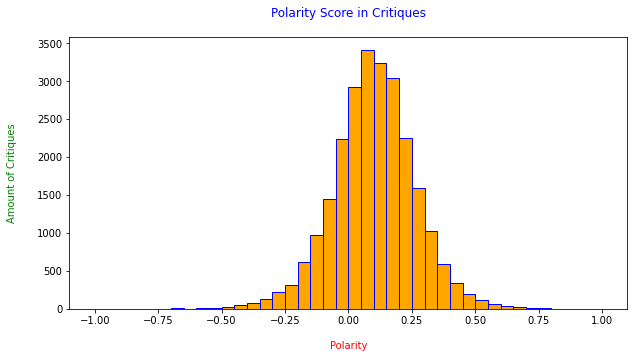

In [20]:
shuffled["polarity"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Polarity Score in Critiques", color = "blue", pad = 20)
plt.xlabel("Polarity", labelpad = 15, color = "red")
plt.ylabel("Amount of Critiques", labelpad = 20, color = "green")

plt.show()

In [21]:
#pip install WordCloud

In [22]:
# Word Cloud
from wordcloud import WordCloud

In [23]:
# Use dropna() so the base DataFrame is not affected
Positive = shuffled[shuffled["Critiques_Clean"] == "Positive"].dropna()
Neutral = shuffled[shuffled["Critiques_Clean"] == "Neutral"].dropna()

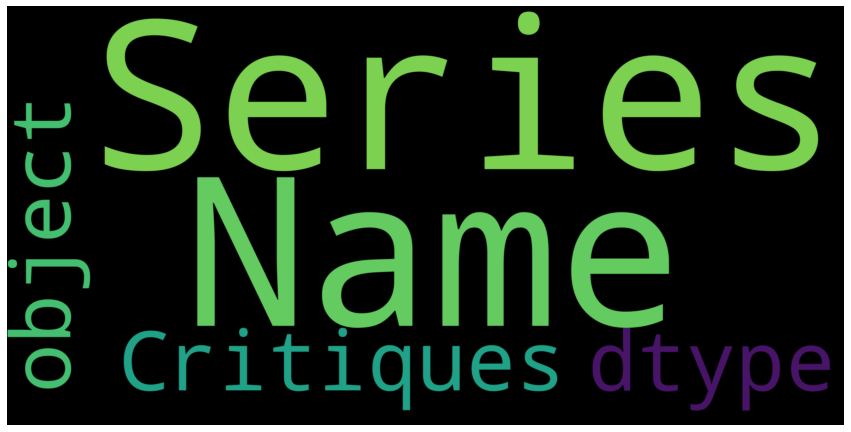

In [24]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["Critiques"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

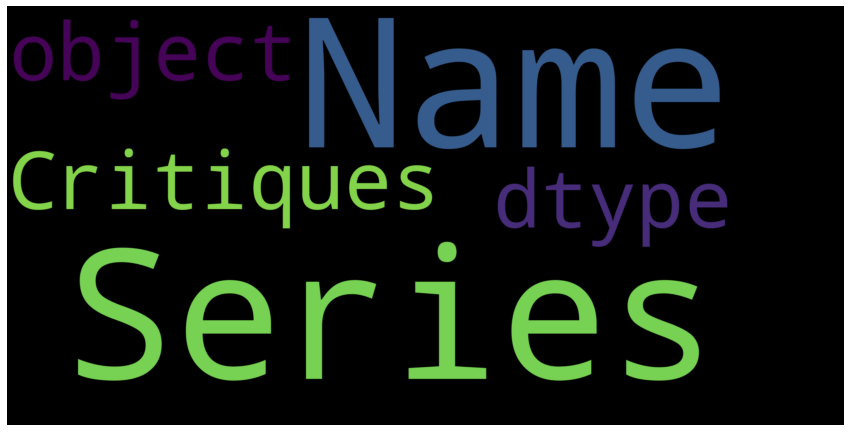

In [25]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["Critiques"]))
plt.figure(figsize = (15, 15))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [26]:
X = shuffled.Critiques_Clean
y = shuffled.Reponse

In [27]:
X[:2]

0    the movie is good and i think tiffany amber is...
1    the sequel is exactly what you will expect it ...
Name: Critiques_Clean, dtype: object

In [28]:
X[:2]

0    the movie is good and i think tiffany amber is...
1    the sequel is exactly what you will expect it ...
Name: Critiques_Clean, dtype: object

In [29]:
y[:2]

0    1
1    1
Name: Reponse, dtype: int64

# SPLIT DATA

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)

In [31]:
print('longuer de X train :', len(X_train))
print('longuer de y train :', len(y_train))
print('longuer de X test :', len(X_test))
print('longuer de y test :', len(y_test))

longuer de X train : 20000
longuer de y train : 20000
longuer de X test : 5000
longuer de y test : 5000


# VECTORISATION

In [32]:
vect = CountVectorizer(stop_words='english', ngram_range = (1,1), max_df = .80, min_df = 4)

In [33]:
vect.fit(X_train)

CountVectorizer(max_df=0.8, min_df=4, stop_words='english')

In [34]:
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

In [35]:
X_train_vect

<20000x26473 sparse matrix of type '<class 'numpy.int64'>'
	with 1673065 stored elements in Compressed Sparse Row format>

## SCALER DATA

In [45]:
transformer = MaxAbsScaler().fit(X_train_vect)
transformer_Xtrain = transformer.transform(X_train_vect)

In [51]:
transformer_Xtest = transformer.transform(X_test_vect)

# Model Selection and Evaluation

In [36]:
# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import joblib

In [37]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

In [57]:
#Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models = [DTree, LogReg, RForest, Bayes, KNN]
#Models_Dict = {0: "Decision_Tree", 1: "Logistic_Regression", 2: "SVC", 3: "Random_Forest", 4: "Naive_Bayes", 5: "K-Neighbors"}
Models_Dict = {0: "Decision_Tree", 1: "Logistic_Regression", 2: "Random_Forest", 3: "Naive_Bayes", 4: "K-Neighbors"}

for i, model in enumerate(Models):
  print('Training model ', Models_Dict[i])
  print('---------------------------------------')
  #save model
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, transformer_Xtrain, y_train, cv = 10, scoring = "accuracy").mean()))
  joblib.dump(model, Models_Dict[i]+'.model')
  print('model ', Models_Dict[i] ,' Enregistré')
  print('---------------------------------------')

Training model  Decision_Tree
---------------------------------------
Decision_Tree Test Accuracy: 0.72715
model  Decision_Tree  Enregistré
---------------------------------------
Training model  Logistic_Regression
---------------------------------------
Logistic_Regression Test Accuracy: 0.8886
model  Logistic_Regression  Enregistré
---------------------------------------
Training model  Random_Forest
---------------------------------------
Random_Forest Test Accuracy: 0.8540000000000001
model  Random_Forest  Enregistré
---------------------------------------
Training model  Naive_Bayes
---------------------------------------
Naive_Bayes Test Accuracy: 0.8561500000000001
model  Naive_Bayes  Enregistré
---------------------------------------
Training model  K-Neighbors
---------------------------------------
K-Neighbors Test Accuracy: 0.6037
model  K-Neighbors  Enregistré
---------------------------------------


# Hyperparameter With GridSearch

In [47]:
import numpy as np
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(transformer_Xtrain, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

c:\python38\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [    nan 0.7155      nan 0.76395     nan 0.7958      nan 0.81695     nan
 0.8273      nan 0.8359      nan 0.8424      nan 0.8464      nan 0.8509
     nan 0.85525     nan 0.8598      nan 0.8644      nan 0.8686      nan
 0.8743      nan 0.8789      nan 0.88215     nan 0.88475     nan 0.8868
     nan 0.88815     nan 0.8894      nan 0.89055     nan 0.8906      nan
 0.89085     nan 0.89035     nan 0.88875     nan 0.8877      nan 0.88545
     nan 0.88415     nan 0.8837      nan 0.88185     nan 0.8803      nan
 0.878       nan 0.8765      nan 0.8756      nan 0.874       nan 0.87335
     nan 0.87215     nan 0.87145     nan 0.87075     nan 0.87005     nan
 0.8696      nan 0.86885     nan 0.86795     nan 0.86665     nan 0.86625
     nan 0.8663      nan 0.86585     nan 0.86555     nan 0.86545     nan
 0.86445]
  warnings.warn(


Best Accuracy: 89.09 %
Best Parameters: {'C': 0.3906939937054613, 'penalty': 'l2'}


# BEST MODEL

In [58]:
Classifier = LogisticRegression(random_state = 0, C = 0.3906939937054613, penalty = 'l2')
Classifier.fit(transformer_Xtrain, y_train)
print('model saved')
joblib.dump(Classifier, 'LG.model')

model saved


['LG.model']

# EVALUATION MODEL LOGISTIQUE REGRESION

In [52]:
Prediction = Classifier.predict(transformer_Xtest)

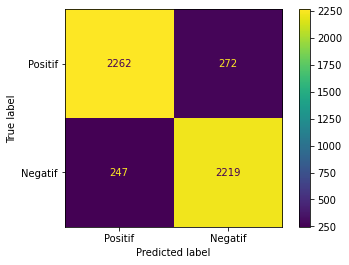

In [55]:
cm = confusion_matrix(y_test, Prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# METHODE 2 : ENTRAINEMENT DES MODELES

# FIRST MODEL (MultinomialNB=)

### Create model MultinomialNB

In [75]:
NB = MultinomialNB()

In [76]:
NB.fit(X_train_vect, y_train)

MultinomialNB()

### Save model

In [39]:
import joblib

In [78]:
import joblib
#save model
joblib.dump(NB, 'NB.model')


['NB.model']

In [79]:

#load saved model
NB_Load = joblib.load('NB.model')

In [80]:
y_pred_load = NB_Load.predict(X_test_vect)

In [81]:
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred_load)*100,'%',sep='')


Naive Bayes
Accuracy Score: 86.64%


In [82]:
y_pred1 = NB.predict(X_test_vect)

In [83]:
print('\nNaive Bayes')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred1)*100,'%',sep='')


Naive Bayes
Accuracy Score: 86.64%


In [84]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred1), sep = '\n')

Confusion Matrix: 
[[2237  278]
 [ 390 2095]]


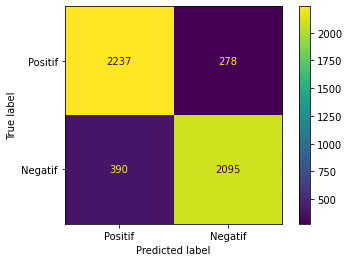

In [85]:
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# SECOND MODEL LogisticRegression

In [44]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

### Create model

#### Scale the data or Transform data

In [87]:
transformer = MaxAbsScaler().fit(X_train_vect)

In [88]:
transformer_Xtrain = transformer.transform(X_train_vect)

In [89]:
transformer_Xtrain

<20000x26910 sparse matrix of type '<class 'numpy.float64'>'
	with 1698436 stored elements in Compressed Sparse Row format>

In [90]:
#Accuracy using Logistic Regression Model
LR = LogisticRegression()
LR

LogisticRegression()

In [91]:
LR.fit(transformer_Xtrain, y_train)

LogisticRegression()

In [92]:
y_pred2 = LR.predict(X_test_vect)

In [93]:
print('\nLogistic Regression')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred2)*100,'%',sep='')


Logistic Regression
Accuracy Score: 86.53999999999999%


### CONFUSION MATRIX

In [94]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred2), sep = '\n')

Confusion Matrix: 
[[2231  284]
 [ 389 2096]]


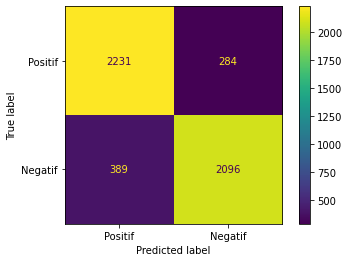

In [95]:
cm = confusion_matrix(y_test, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# 3rd MODEL

### Create Model SVM

In [96]:
SVM = LinearSVC()

### FIT MODEL

In [97]:
SVM.fit(transformer_Xtrain, y_train)

LinearSVC()

### Predict model

In [98]:
y_pred3 = SVM.predict(X_test_vect)

In [99]:
print('\nSupport Vector Machine')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred3)*100,'%',sep='')


Support Vector Machine
Accuracy Score: 86.56%


### Confusion matrix

In [67]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred3), sep = '\n')

Confusion Matrix: 
[[2180  348]
 [ 323 2149]]


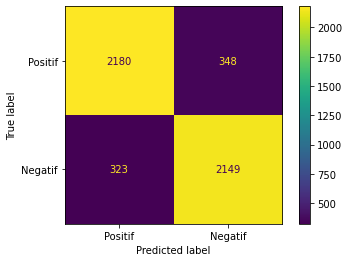

In [68]:
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

# 4rd MODEL KNN

### Create model

In [69]:
KNN = KNeighborsClassifier(n_neighbors = 2)

### Fit model


In [70]:
KNN.fit(X_train_vect, y_train)

KNeighborsClassifier(n_neighbors=2)

### Predict model

In [71]:
y_pred4 = KNN.predict(X_test_vect)

In [72]:
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred4)*100,'%',sep='')


K Nearest Neighbors (NN = 3)
Accuracy Score: 57.620000000000005%


### Confusion matrix

In [73]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred4), sep = '\n')

Confusion Matrix: 
[[2269  259]
 [1860  612]]


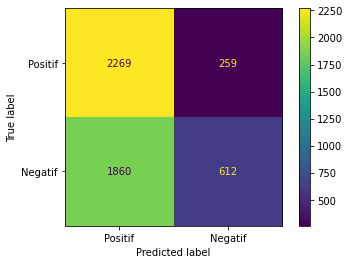

In [74]:
cm = confusion_matrix(y_test, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positif', 'Negatif'])
disp.plot()
plt.show()

## KNN with Data transform

In [75]:
KNN2 = KNeighborsClassifier(n_neighbors = 2)

In [76]:
KNN2.fit(transformer_Xtrain, y_train)

KNeighborsClassifier(n_neighbors=2)

In [77]:
y_pred4_ = KNN2.predict(X_test_vect)

In [78]:
print('\nK Nearest Neighbors (NN = 3)')
print('Accuracy Score: ',metrics.accuracy_score(y_test,y_pred4_)*100,'%',sep='')


K Nearest Neighbors (NN = 3)
Accuracy Score: 71.48%


In [79]:
print('Confusion Matrix: ',metrics.confusion_matrix(y_test,y_pred4_), sep = '\n')

Confusion Matrix: 
[[2144  384]
 [1042 1430]]


In [80]:
KNN_scor = metrics.accuracy_score(y_test,y_pred4)*100
KNN_transform = metrics.accuracy_score(y_test,y_pred4_)*100
SVM_scor = metrics.accuracy_score(y_test,y_pred3)*100
LG_scor = metrics.accuracy_score(y_test,y_pred2)*100
NB_sco = metrics.accuracy_score(y_test,y_pred1)*100

In [88]:
models_train = {'MODEL': ['KNN', 'KNN transform', 'SVM', 'LRegression','NAIVE BAYES'], 'ACCURACY': [KNN_scor, KNN_transform, SVM_scor, LG_scor,NB_sco]}
model_fit = pd.DataFrame(models_train)

In [89]:
model_fit

,MODEL,ACCURACY
0,KNN,57.62
1,KNN transform,71.48
2,SVM,86.58
3,LRegression,87.06
4,NAIVE BAYES,85.70


In [90]:
model_fit.to_csv('model_result.csv', index=False)

In [91]:
pd.read_csv('model_result.csv')

,MODEL,ACCURACY
0,KNN,57.62
1,KNN transform,71.48
2,SVM,86.58
3,LRegression,87.06
4,NAIVE BAYES,85.70


# TEST MODEL LG

In [ ]:
import joblib

In [49]:
test = []
test.append(input())
print(test)
test_vect = vect.transform(test)
print(test_vect)
predLabel = NB_Load.predict(test_vect)
tags = ['Negative','Positive']
print("Le model à prédict que votre commentaire est ",tags[predLabel[0]])

['']


NameError: name 'vect' is not defined

In [ ]:
test = []
test.append(input())
test_vect = vect.transform(test)
predLabel = LR.predict(test_vect)
tags = ['Negative','Positive']
print("Le model à prédict que votre commentaire est ",tags[predLabel[0]])